In [1]:
import os
import numpy as np
from tomography_radon import get_rmse, plot_fbp_reconstruction, get_system, get_ssim
from skimage.filters import threshold_mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Calculate RMSE for each reconstruction, image and matrix size

In [3]:
search_path = 'Results/ResultsBinary/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg") and not _.endswith(".pdf")]
rms = np.zeros((4, 4, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            thresh_fbp = threshold_mean(recon_fbp)
            recon_fbp = recon_fbp > thresh_fbp
            thresh_sart = threshold_mean(recon_sart)
            recon_sart = recon_sart > thresh_sart
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            thresh_sart = threshold_mean(recon_pi)
            recon_pi = recon_pi > thresh_sart
            rmse_qa = get_rmse(recon_qa.astype(int), image)
            rmse_fbp = get_rmse(recon_fbp.astype(int), image)
            rmse_sart = get_rmse(recon_sart.astype(int), image)
            rmse_pi = get_rmse(recon_pi.astype(int), image)
            rms[i, j, 0] = rmse_fbp
            rms[i, j, 1] = rmse_sart
            rms[i, j, 2] = rmse_pi
            rms[i, j, 3] = rmse_qa

['foam', 'molecule', 'snowflake', 'tree']


## Calculate SSIM for each reconstruction, image and matrix size

In [4]:
search_path = 'Results/ResultsBinary/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg") and not _.endswith(".pdf")]
ssim = np.zeros((4, 4, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    for s, j in zip(sizes, range(len(sizes))):
        if j == 0:
            res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
            if res: 
                res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
                image = res_npz['image']
                recon_fbp = res_npz['reconstruction_fbp']
                recon_sart = res_npz['reconstruction_sart']
                recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
                system = get_system(image)
                sinogram = res_npz['sinogram']
                recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
                ssim_qa = get_ssim(np.resize(recon_qa, (8,8)), np.resize(image, (8,8)))[0]
                ssim_fbp = get_ssim(np.resize(recon_fbp, (8,8)), np.resize(image, (8,8)))[0]
                ssim_sart = get_ssim(np.resize(recon_sart, (8,8)), np.resize(image, (8,8)))[0]
                ssim_pi = get_ssim(np.resize(recon_pi, (8,8)), np.resize(image, (8,8)))[0]
                ssim[i, j, 0] = ssim_fbp
                ssim[i, j, 1] = ssim_sart
                ssim[i, j, 2] = ssim_pi
                ssim[i, j, 3] = ssim_qa
        else:
            res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
            if res: 
                res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
                image = res_npz['image']
                recon_fbp = res_npz['reconstruction_fbp']
                recon_sart = res_npz['reconstruction_sart']
                recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
                system = get_system(image)
                sinogram = res_npz['sinogram']
                recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
                ssim_qa = get_ssim(recon_qa, image)[0]
                ssim_fbp = get_ssim(recon_fbp, image)[0]
                ssim_sart = get_ssim(recon_sart, image)[0]
                ssim_pi = get_ssim(recon_pi, image)[0]
                ssim[i, j, 0] = ssim_fbp
                ssim[i, j, 1] = ssim_sart
                ssim[i, j, 2] = ssim_pi
                ssim[i, j, 3] = ssim_qa

['foam', 'molecule', 'snowflake', 'tree']


C:\Users\z004c7cw\Anaconda3\envs\dwave\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


## Plot all images

In [ ]:
search_path = 'Results/ResultsBinary/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    w = 20
    h = 20
    columns = 6
    print(columns)
    rows = len(sizes)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            thresh_fbp = threshold_mean(recon_fbp)
            recon_fbp = recon_fbp > thresh_fbp
            thresh_sart = threshold_mean(recon_sart)
            recon_sart = recon_sart > thresh_sart
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            thresh_sart = threshold_mean(recon_pi)
            recon_pi = recon_pi > thresh_sart
            # fig.add_subplot(rows, columns, j*columns + 1 )
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            ax[j, 1].imshow(sinogram.reshape(image.shape), cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    print("Helloe")
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)

    # rows = ["4 x 4 px", "8 x 8 px", "12 x 12 px", "16 x 16 px", "20 x20 px", "24 x 24 px", "28 x 28 px", "32 x 32 px"]
    rows = sizes
    for axe, row in zip(ax[:,0], rows):
        axe.set_ylabel(row, rotation=0, size=40)
        axe.yaxis.set_label_coords(-.5, 0.3)
    fig.tight_layout()
    plt.savefig(search_path + f + ".png", bbox_inches='tight')
    plt.show()
    
            

## Plot mean RMSE for each reconstruction over matrix size

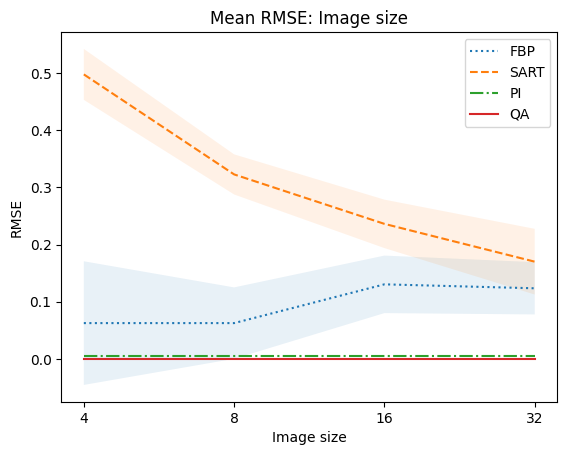

In [6]:
rms_mean = np.sum(rms, axis=0)/4
mat_sizes = [4, 8, 16, 32]
plt.plot (rms_mean[:, 0], label='FBP', linestyle='dotted')
plt.fill_between(range(4), rms_mean[:, 0]-np.std(rms[:, :, 0], axis=0), rms_mean[:, 0]+np.std(rms[:, :, 0], axis=0), alpha=.1)
plt.plot (rms_mean[:, 1], label='SART', linestyle='dashed')
plt.fill_between(range(4), rms_mean[:, 1]-np.std(rms[:, :, 1], axis=0), rms_mean[:, 1]+np.std(rms[:, :, 1], axis=0), alpha=.1)
plt.plot (rms_mean[:, 2]+0.005, label='PI', linestyle='dashdot')
plt.fill_between(range(4), rms_mean[:, 2]-np.std(rms[:, :, 2], axis=0), rms_mean[:, 2]+np.std(rms[:, :, 2], axis=0), alpha=.1)
plt.plot (rms_mean[:, 3], label='QA', linestyle='solid')
plt.fill_between(range(4), rms_mean[:, 3]-np.std(rms[:, :, 3], axis=0), rms_mean[:, 3]+np.std(rms[:, :, 3], axis=0), alpha=.1)
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("Mean RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/mean_rmse.png", format="png")
plt.savefig("Results/ResultsBinary/mean_rmse.pdf", format="pdf")
plt.show()

## Plot mean RMSE for each reconstruction over matrix size

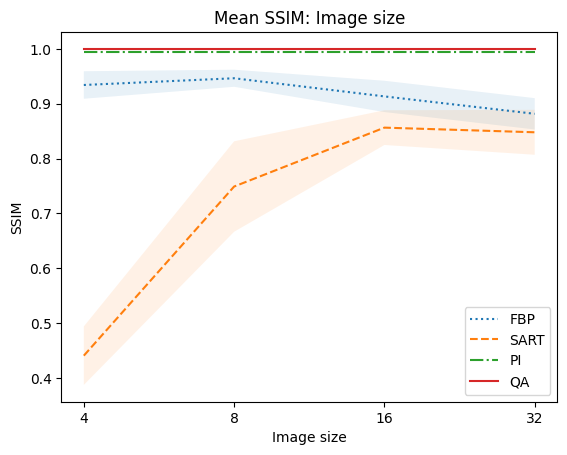

In [9]:
ssim_mean = np.sum(ssim, axis=0)/4
mat_sizes = [4, 8, 16, 32]
plt.plot (ssim_mean[:, 0], label='FBP', linestyle='dotted')
plt.fill_between(range(4), ssim_mean[:, 0]-np.std(ssim[:, :, 0], axis=0), ssim_mean[:, 0]+np.std(ssim[:, :, 0], axis=0), alpha=.1)
plt.plot (ssim_mean[:, 1], label='SART', linestyle='dashed')
plt.fill_between(range(4), ssim_mean[:, 1]-np.std(ssim[:, :, 1], axis=0), ssim_mean[:, 1]+np.std(ssim[:, :, 1], axis=0), alpha=.1)
plt.plot (ssim_mean[:, 2]-0.005, label='PI', linestyle='dashdot')
plt.fill_between(range(4), ssim_mean[:, 2]-np.std(ssim[:, :, 2], axis=0), ssim_mean[:, 2]+np.std(ssim[:, :, 2], axis=0), alpha=.1)
plt.plot (ssim_mean[:, 3], label='QA', linestyle='solid')
plt.fill_between(range(4), ssim_mean[:, 3]-np.std(ssim[:, :, 3], axis=0), ssim_mean[:, 3]+np.std(ssim[:, :, 3], axis=0), alpha=.1)
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("SSIM")
plt.title("Mean SSIM: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/mean_ssim.png", format="png")
plt.savefig("Results/ResultsBinary/mean_ssim.pdf", format="pdf")
plt.show()

## Plot RMSE for each reconstruction over matrix size for Foam.png

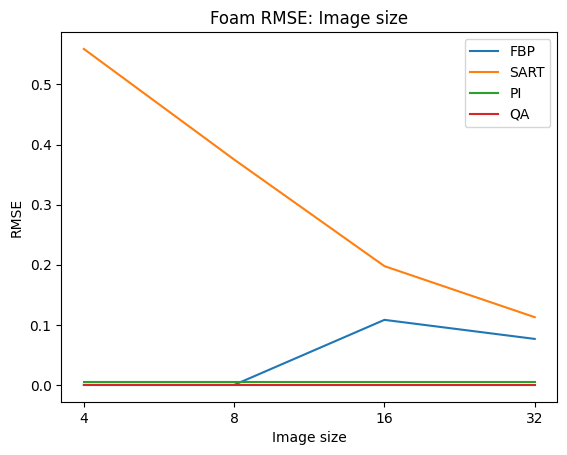

In [9]:
rms_foam = rms[0, ...]
mat_sizes = [4, 8, 16, 32]
plt.plot(rms_foam[:, 0], label='FBP')
plt.plot(rms_foam[:, 1], label='SART')
plt.plot(rms_foam[:, 2]+0.005, label='PI')
plt.plot(rms_foam[:, 3], label='QA')
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("Foam RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/foam_rmse.png")
plt.show()## Plot RMSE for each reconstruction over matrix size for Foam.png

## Plot RMSE for each reconstruction over matrix size for Molecule.png

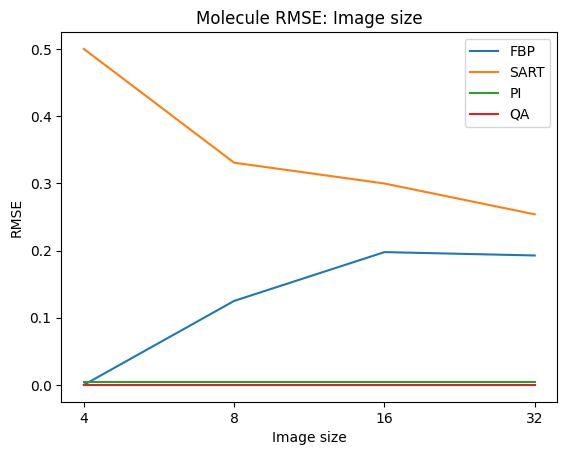

In [10]:
rms_molecule = rms[1, ...]
mat_sizes = [4, 8, 16, 32]
plt.plot (rms_molecule[:, 0], label='FBP')
plt.plot (rms_molecule[:, 1], label='SART')
plt.plot (rms_molecule[:, 2]+0.005, label='PI')
plt.plot (rms_molecule[:, 3], label='QA')
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("Molecule RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/molecule_rmse.png")
plt.show()

## Plot RMSE for each reconstruction over matrix size for Snowflake.png

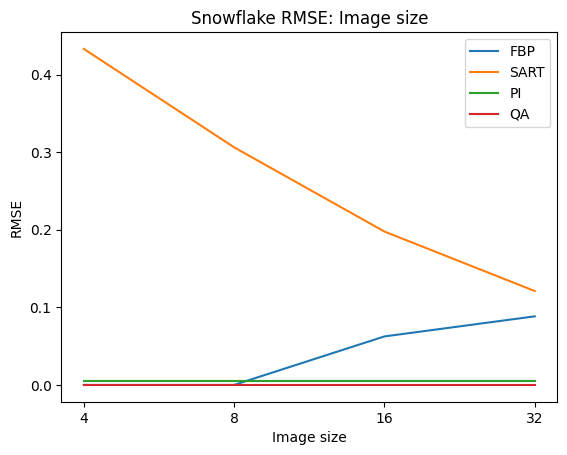

In [11]:
rms_snowflake = rms[2, ...]
mat_sizes = [4, 8, 16, 32]
plt.plot (rms_snowflake[:, 0], label='FBP')
plt.plot (rms_snowflake[:, 1], label='SART')
plt.plot (rms_snowflake[:, 2]+0.005, label='PI')
plt.plot (rms_snowflake[:, 3], label='QA')
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("Snowflake RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/snowflake_rmse.png")
plt.show()

## Plot RMSE for each reconstruction over matrix size for Tree.png

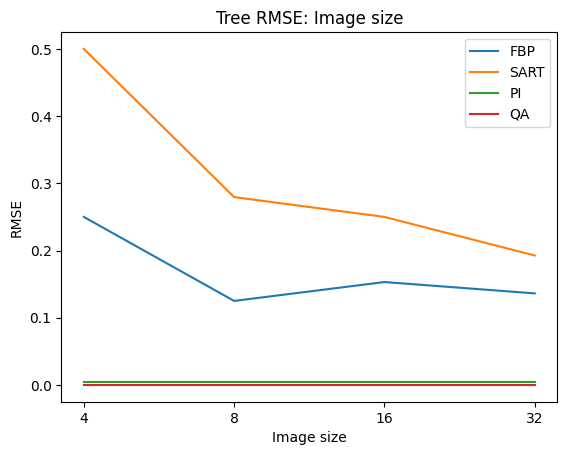

In [12]:
rms_tree = rms[3, ...]
mat_sizes = [4, 8, 16, 32]
plt.plot (rms_tree[:, 0], label='FBP')
plt.plot (rms_tree[:, 1], label='SART')
plt.plot (rms_tree[:, 2]+0.005, label='PI')
plt.plot (rms_tree[:, 3], label='QA')
plt.xticks(range(4), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("Tree RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsBinary/tree_rmse.png")
plt.show()

In [ ]:
rms_mean = np.sum(rms, axis=0)/4
df_fbp = pd.DataFrame(rms_mean)
sns.lineplot(data=df_fbp)
df_sart = pd.DataFrame(rms_mean)
sns.lineplot(data=df_sart)
df_qa = pd.DataFrame(rms_mean)
sns.lineplot(data=df_qa)
plt.show()